In [3]:
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np

In [4]:
#Read in all DataFrames
energy_df = pd.read_csv('energy_data.csv')
fin_df = pd.read_csv('fin_data.csv')
mater_df = pd.read_csv('mater_data.csv')
cons_stap_df = pd.read_csv('cons_stap_data.csv')
indust_df = pd.read_csv('indust_data.csv')
comms_df = pd.read_csv('comms_data.csv')
real_df = pd.read_csv('real_data.csv')
tech_df = pd.read_csv('tech_data.csv')
util_df = pd.read_csv('util_data.csv')
cons_disc_df = pd.read_csv('cons_disc_data.csv')
health_df = pd.read_csv('health_data.csv')

energy_r = pd.read_csv('energy_returns.csv')
mater_r = pd.read_csv('mater_returns.csv')
fin_r = pd.read_csv('fin_returns.csv')
cons_stap_r = pd.read_csv('cons_stap_returns.csv')
indust_r = pd.read_csv('indust_returns.csv')
comms_r = pd.read_csv('comms_returns.csv')
real_r = pd.read_csv('real_returns.csv')
tech_r = pd.read_csv('tech_returns.csv')
util_r = pd.read_csv('util_returns.csv')
cons_disc_r = pd.read_csv('cons_disc_returns.csv')
health_r = pd.read_csv('health_returns.csv')

energy_p = pd.read_csv('energy_prices.csv')
mater_p = pd.read_csv('mater_prices.csv')
fin_p = pd.read_csv('fin_prices.csv')
cons_stap_p = pd.read_csv('cons_stap_prices.csv')
indust_p = pd.read_csv('indust_prices.csv')
comms_p = pd.read_csv('comms_prices.csv')
real_p = pd.read_csv('real_prices.csv')
tech_p = pd.read_csv('tech_prices.csv')
util_p = pd.read_csv('util_prices.csv')
cons_disc_p = pd.read_csv('cons_disc_prices.csv')
health_p = pd.read_csv('health_prices.csv')

stock_r = pd.read_csv('stock_returns.csv')
stock_p = pd.read_csv('stock_prices.csv')

stocks_df = pd.read_csv('stocks_data.csv')

1. Can you count something interesting? 
The follwoing code finds the mean of the close column for WY and then counts the days the asset price closed above the mean close

In [17]:
wy = real_p['WY']
wy_p_mean = np.mean(wy)
wy_p_mean

28.505149509917885

In [18]:
wy.loc[real_p['WY'] > wy_p_mean].count()

655

2. Can you make a bar plot or a histogram?
Here I will create two histograms to compare the returns of one real estate stock vs one tech stock


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E98B0A2710>]],
      dtype=object)

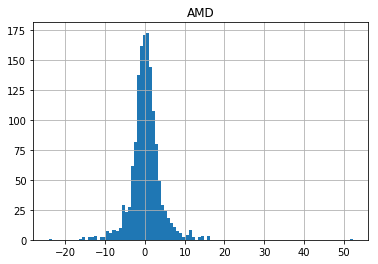

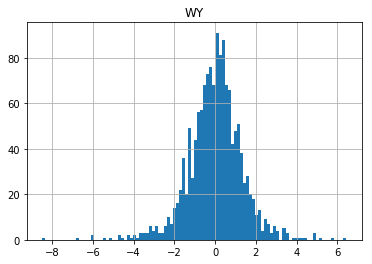

In [23]:
tech_r.hist('AMD', bins=100)
real_r.hist('WY', bins=100)

3. Can you compare two related quantities? Below I display the correlation matrix for both the tech prices and tech returns DataFrames

In [28]:
corr = tech_p.corr()
corr.style.background_gradient()

,AAPL,AMAT,AMD,CSCO,INTL,MSFT,MU,NVDA,ORCL,V
AAPL,1,0.833039,0.839461,0.940782,0.899639,0.948356,0.783684,0.916242,0.904135,0.956468
AMAT,0.833039,1,0.73118,0.824339,0.799834,0.843937,0.786231,0.926111,0.867137,0.834913
AMD,0.839461,0.73118,1,0.865135,0.777766,0.890669,0.639945,0.870001,0.748089,0.863323
CSCO,0.940782,0.824339,0.865135,1,0.892965,0.977215,0.740863,0.927634,0.836092,0.974838
INTL,0.899639,0.799834,0.777766,0.892965,1,0.894334,0.611239,0.876755,0.773307,0.913749
MSFT,0.948356,0.843937,0.890669,0.977215,0.894334,1,0.746634,0.950656,0.853291,0.989077
MU,0.783684,0.786231,0.639945,0.740863,0.611239,0.746634,1,0.799951,0.776867,0.714782
NVDA,0.916242,0.926111,0.870001,0.927634,0.876755,0.950656,0.799951,1,0.844456,0.94019
ORCL,0.904135,0.867137,0.748089,0.836092,0.773307,0.853291,0.776867,0.844456,1,0.85962
V,0.956468,0.834913,0.863323,0.974838,0.913749,0.989077,0.714782,0.94019,0.85962,1


In [29]:
corr = tech_r.corr()
corr.style.background_gradient()

,AAPL,AMAT,AMD,CSCO,INTL,MSFT,MU,NVDA,ORCL,V
AAPL,1,0.421982,0.230296,0.418919,0.251939,0.461345,0.338138,0.356121,0.366329,0.422874
AMAT,0.421982,1,0.333103,0.425575,0.274393,0.446197,0.534124,0.513304,0.378791,0.464006
AMD,0.230296,0.333103,1,0.22448,0.178043,0.22311,0.347311,0.397557,0.252063,0.274399
CSCO,0.418919,0.425575,0.22448,1,0.302408,0.517631,0.369193,0.392534,0.475783,0.476636
INTL,0.251939,0.274393,0.178043,0.302408,1,0.27433,0.267843,0.243308,0.271477,0.302259
MSFT,0.461345,0.446197,0.22311,0.517631,0.27433,1,0.366178,0.416461,0.4699,0.542139
MU,0.338138,0.534124,0.347311,0.369193,0.267843,0.366178,1,0.445794,0.322161,0.398443
NVDA,0.356121,0.513304,0.397557,0.392534,0.243308,0.416461,0.445794,1,0.306656,0.409302
ORCL,0.366329,0.378791,0.252063,0.475783,0.271477,0.4699,0.322161,0.306656,1,0.469696
V,0.422874,0.464006,0.274399,0.476636,0.302259,0.542139,0.398443,0.409302,0.469696,1


4. Can you make a scatterplot? Below is a scatterplot of Walmart vs Facebook returns

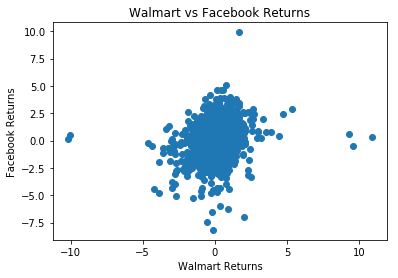

In [30]:
wmt = cons_stap_r['WMT']
f = cons_disc_r['F']
plt.scatter(wmt, f)
plt.xlabel('Walmart Returns')
plt.ylabel('Facebook Returns')
plt.title('Walmart vs Facebook Returns')
plt.show()

5. Can you make a time-series plot? Below is a plot of the price movement over time of AAPL

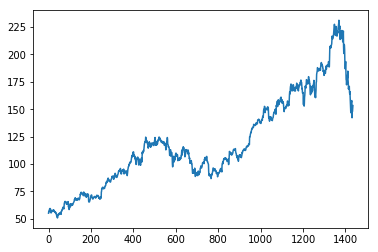

In [32]:
plt.plot(tech_p['AAPL'])

6. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask? After looking at these plots, I can see that, based off the histogram, the AMD stock retruns were less risky than the WY returns. I would like to find the average returns of each of their sectors to do similar comparison and see if Real Estate stocks are more to less risky than Technology stocks. I can also compare all sectors and start to develop a risk profile. I also plan to explore correlation matrices within all sectors and between sectors to develop diverse portfolios. 